In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [2]:
df = pd.read_csv("pythonproject.csv")

In [3]:
df.shape

(3154, 11)

In [4]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Assam,Guwahati,"Pan Bazaar, Guwahati - PCBA",07-04-2025 10:00:00,26.187500,91.744194,OZONE,17.0,17.0,17.0
1,India,Assam,Guwahati,"Railway Colony, Guwahati - PCBA",07-04-2025 10:00:00,26.181742,91.780630,SO2,19.0,20.0,19.0
2,India,Assam,Nagaon,"Christianpatty, Nagaon - PCBA",07-04-2025 10:00:00,26.349082,92.684490,NO2,NaN,NaN,NaN
3,India,Assam,Nalbari,"Bata Chowk, Nalbari - PCBA",07-04-2025 10:00:00,26.446912,91.439057,SO2,1.0,6.0,3.0
4,India,Assam,Silchar,"Tarapur, Silchar - PCBA",07-04-2025 10:00:00,24.828270,92.795250,NO2,2.0,16.0,11.0


In [5]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [6]:
df.tail()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3149,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",07-04-2025 10:00:00,22.544808,88.340369,CO,10.0,57.0,17.0
3150,India,West_Bengal,Howrah,"Botanical Garden, Howrah - WBPCB",07-04-2025 10:00:00,22.554954,88.292568,PM2.5,14.0,64.0,38.0
3151,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",07-04-2025 10:00:00,22.544808,88.340369,OZONE,17.0,103.0,24.0
3152,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",07-04-2025 10:00:00,22.499290,88.369170,OZONE,12.0,83.0,16.0
3153,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",07-04-2025 10:00:00,22.499290,88.369170,CO,16.0,22.0,19.0


In [7]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3154.000000,3154.000000,2892.000000,2892.000000,2892.000000
mean,22.214485,78.771529,22.330567,88.100968,46.140041
std,5.573969,4.943836,24.078233,96.611237,50.347661
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,18.976700,75.555917,5.000000,19.000000,11.000000
50%,23.076793,77.498280,14.000000,58.000000,28.000000
75%,26.766433,80.927299,31.000000,116.000000,63.000000
max,34.066206,94.636574,192.000000,500.000000,371.000000


In [8]:
df.info

<bound method DataFrame.info of      country        state      city                           station  \
0      India        Assam  Guwahati       Pan Bazaar, Guwahati - PCBA   
1      India        Assam  Guwahati   Railway Colony, Guwahati - PCBA   
2      India        Assam    Nagaon     Christianpatty, Nagaon - PCBA   
3      India        Assam   Nalbari        Bata Chowk, Nalbari - PCBA   
4      India        Assam   Silchar           Tarapur, Silchar - PCBA   
...      ...          ...       ...                               ...   
3149   India  West_Bengal   Kolkata         Victoria, Kolkata - WBPCB   
3150   India  West_Bengal    Howrah  Botanical Garden, Howrah - WBPCB   
3151   India  West_Bengal   Kolkata         Victoria, Kolkata - WBPCB   
3152   India  West_Bengal   Kolkata         Jadavpur, Kolkata - WBPCB   
3153   India  West_Bengal   Kolkata         Jadavpur, Kolkata - WBPCB   

              last_update   latitude  longitude pollutant_id  pollutant_min  \
0     07-04-

In [9]:
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    262
pollutant_max    262
pollutant_avg    262
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

country           object
state             object
city              object
station           object
last_update       object
latitude         float64
longitude        float64
pollutant_id      object
pollutant_min    float64
pollutant_max    float64
pollutant_avg    float64
dtype: object

#Relating the variable with scatterplot between pollutant id, pollutant min,pollutant max,pollutant avg.

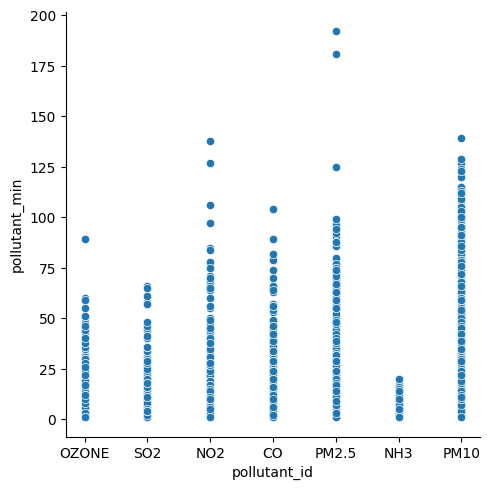

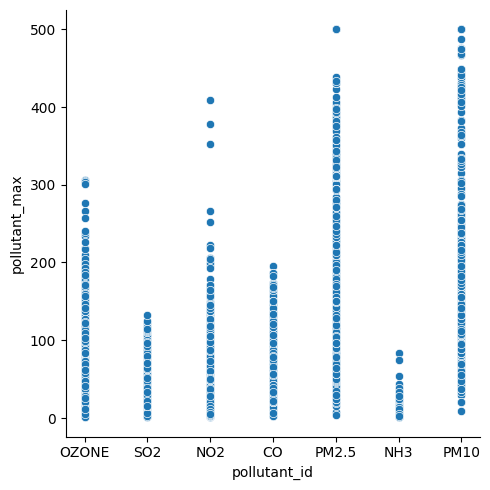

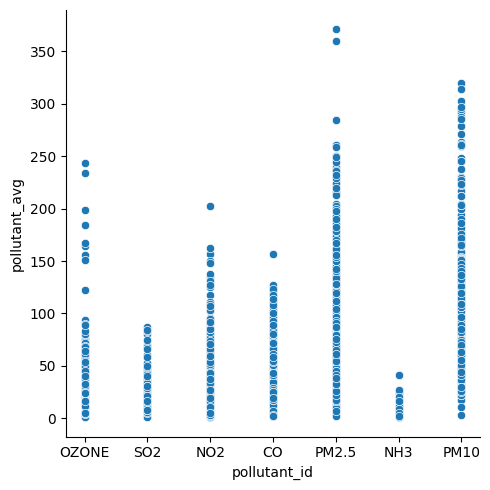

In [12]:
sns.relplot(x="pollutant_id",y="pollutant_min",data=df)
sns.relplot(x="pollutant_id",y="pollutant_max",data=df)
sns.relplot(x="pollutant_id",y="pollutant_avg",data=df)

#Visualize the pairwise relationships between multiple numeric variables like latitude,longitude,pollutant min,pollutant avg,pollutant max.

Text(0.5, 1.02, 'Pair Plot of Pollutant Measurements')

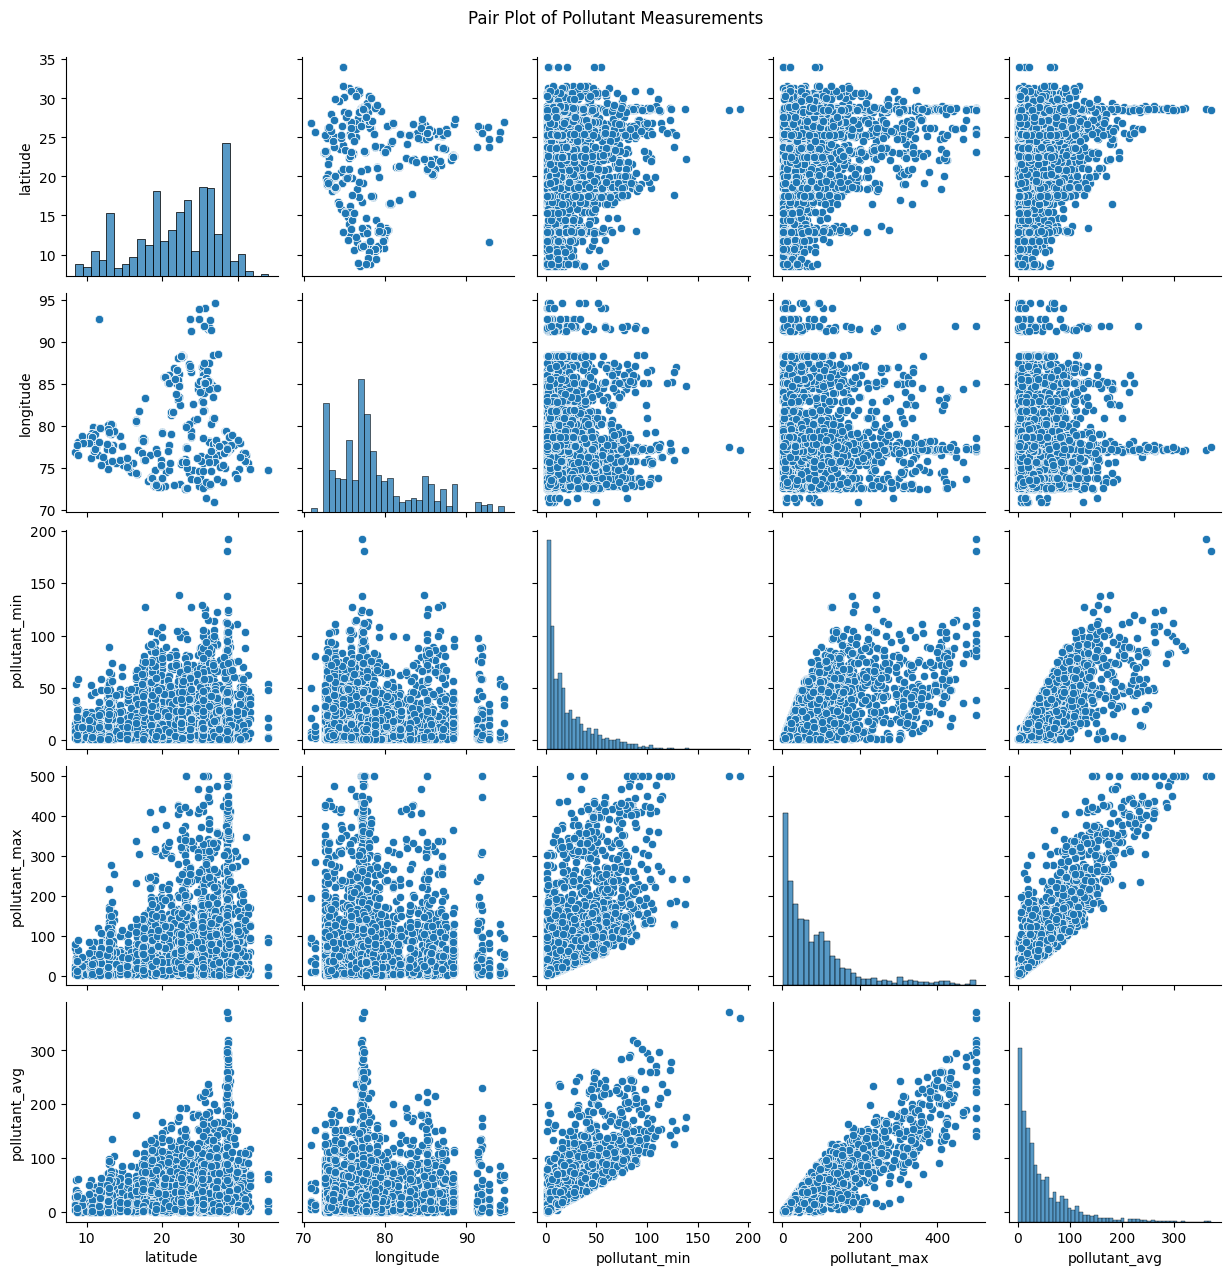

In [13]:
sns.pairplot(df)
plt.suptitle("Pair Plot of Pollutant Measurements", y=1.02)

#Relational plot between pollutant min,pollutant avg,pollutant max.

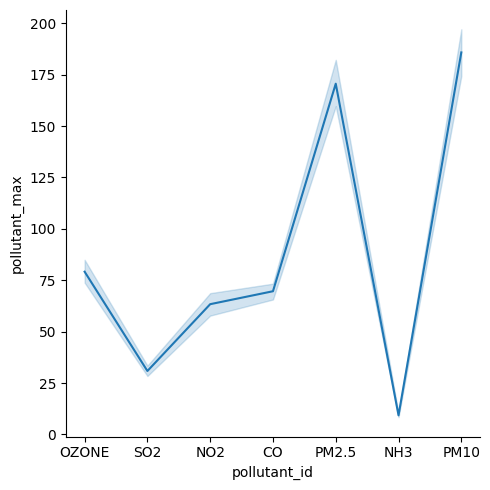

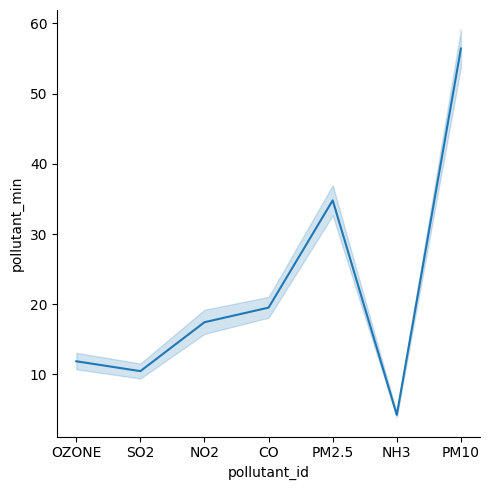

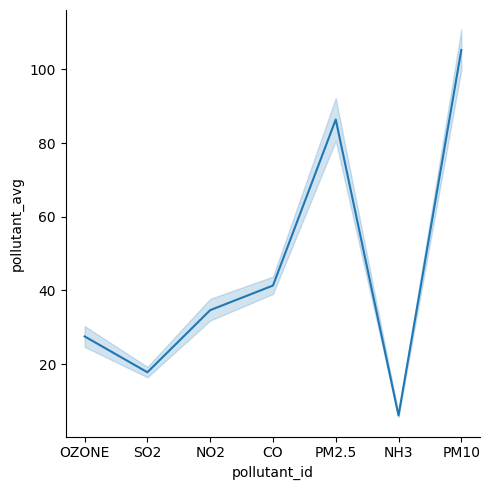

In [14]:
sns.relplot(x='pollutant_id',y='pollutant_max',kind='line',data=df)
sns.relplot(x='pollutant_id',y='pollutant_min',kind='line',data=df)
sns.relplot(x='pollutant_id',y='pollutant_avg',kind='line',data=df)

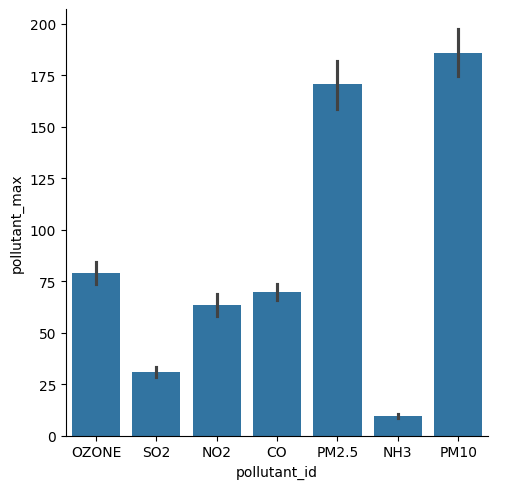

In [15]:
sns.catplot(x='pollutant_id',y='pollutant_max',kind='bar',data=df)

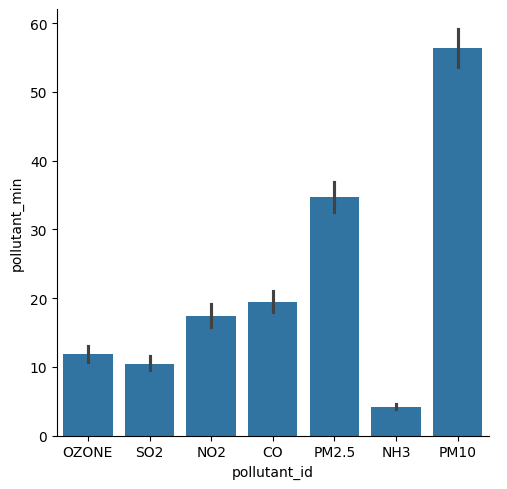

In [16]:
sns.catplot(x='pollutant_id',y='pollutant_min',kind='bar',data=df)

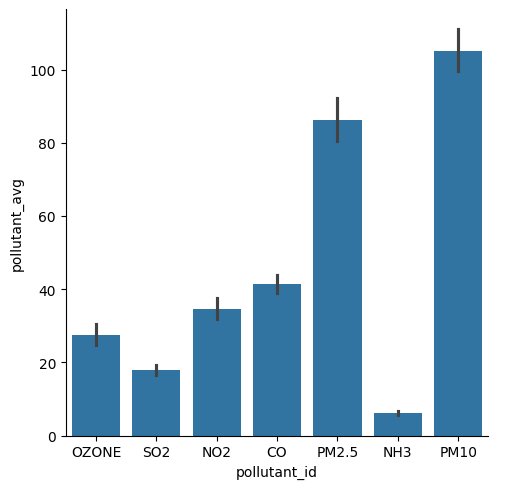

In [17]:
sns.catplot(x='pollutant_id',y='pollutant_avg',kind='bar',data=df)

#Track and display real-time min, max, avg values for each pollutant across cities/stations.

In [18]:
clean_df = df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'])
monitor_stats = clean_df.groupby(['pollutant_id', 'city'])[['pollutant_min', 'pollutant_max', 'pollutant_avg']].mean().reset_index()
print(monitor_stats)

     pollutant_id        city  pollutant_min  pollutant_max  pollutant_avg
0              CO    Agartala       4.000000      48.000000       6.000000
1              CO        Agra      14.500000      32.000000      23.666667
2              CO   Ahmedabad       8.714286     118.571429      18.142857
3              CO  Ahmednagar      18.000000     142.000000      49.000000
4              CO      Aizawl       3.000000       3.000000       3.000000
...           ...         ...            ...            ...            ...
1561          SO2       Vatva      16.000000      34.000000      24.000000
1562          SO2     Vellore      16.000000      16.000000      16.000000
1563          SO2  Vijayawada       6.000000      16.000000      10.333333
1564          SO2   Vrindavan      29.000000      33.000000      31.000000
1565          SO2      Yadgir      13.000000      18.000000      15.000000

[1566 rows x 5 columns]


#Identify and rank cities with the highest average pollution and calculate overall average pollution per city.

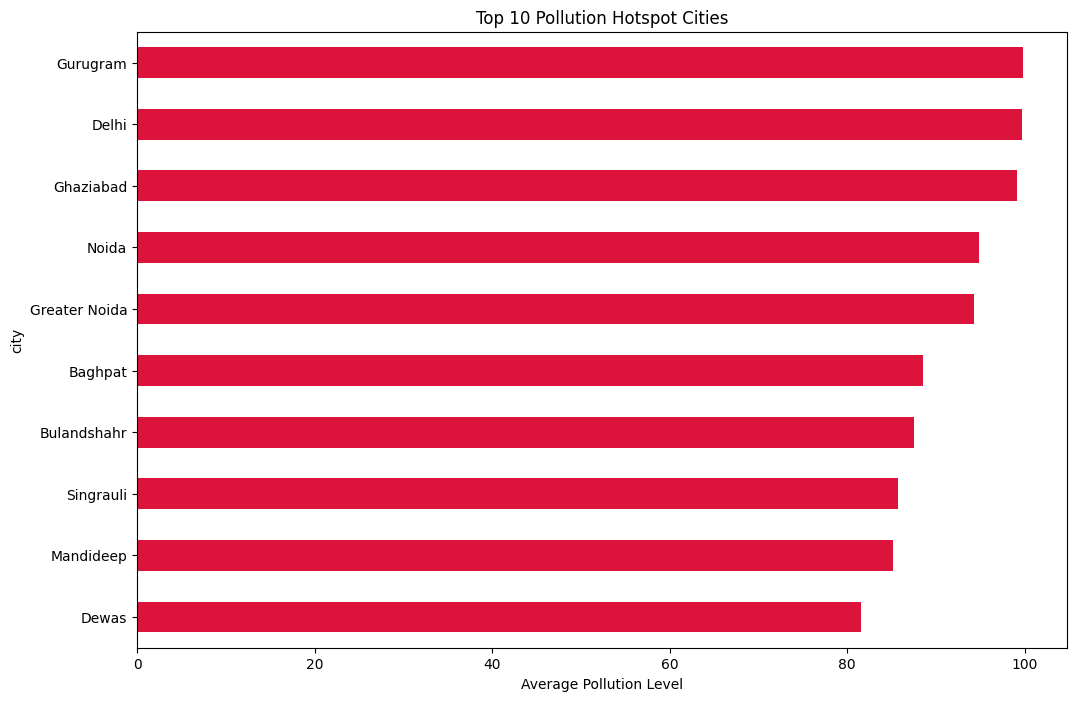

In [32]:
hotspots = clean_df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(10)
hotspots.plot(kind='barh', figsize=(12, 8), color='crimson')
plt.xlabel('Average Pollution Level')
plt.title('Top 10 Pollution Hotspot Cities')
plt.gca().invert_yaxis()
plt.show()

#Visualize pollution using latitude & longitude with seaborn.

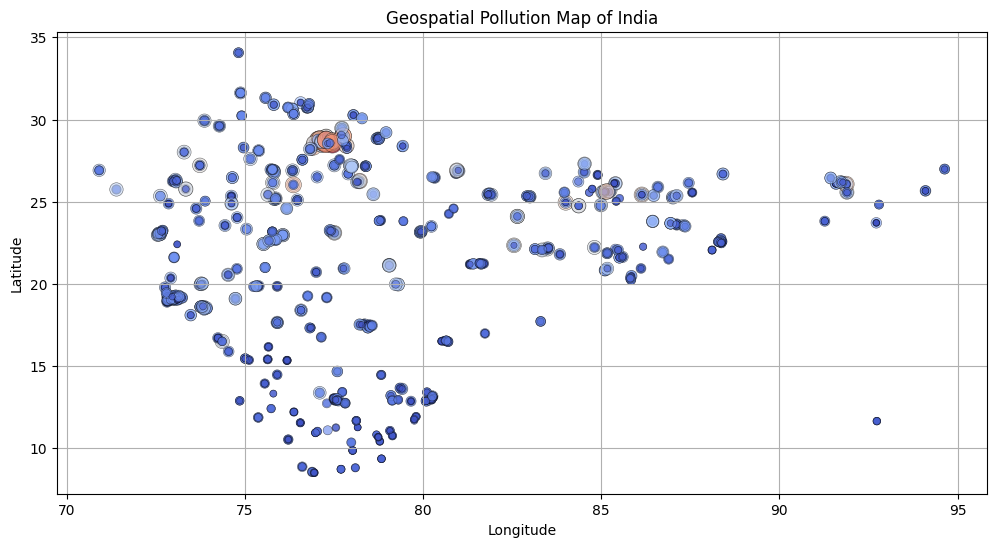

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=clean_df, 
    x='longitude', y='latitude', 
    hue='pollutant_avg', 
    size='pollutant_avg', 
    palette='coolwarm', 
    sizes=(20, 200), 
    alpha=0.6, 
    edgecolor='k', 
    legend=False
)
plt.title('Geospatial Pollution Map of India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

#Compare pollutant averages across states and average of each pollutant across states.

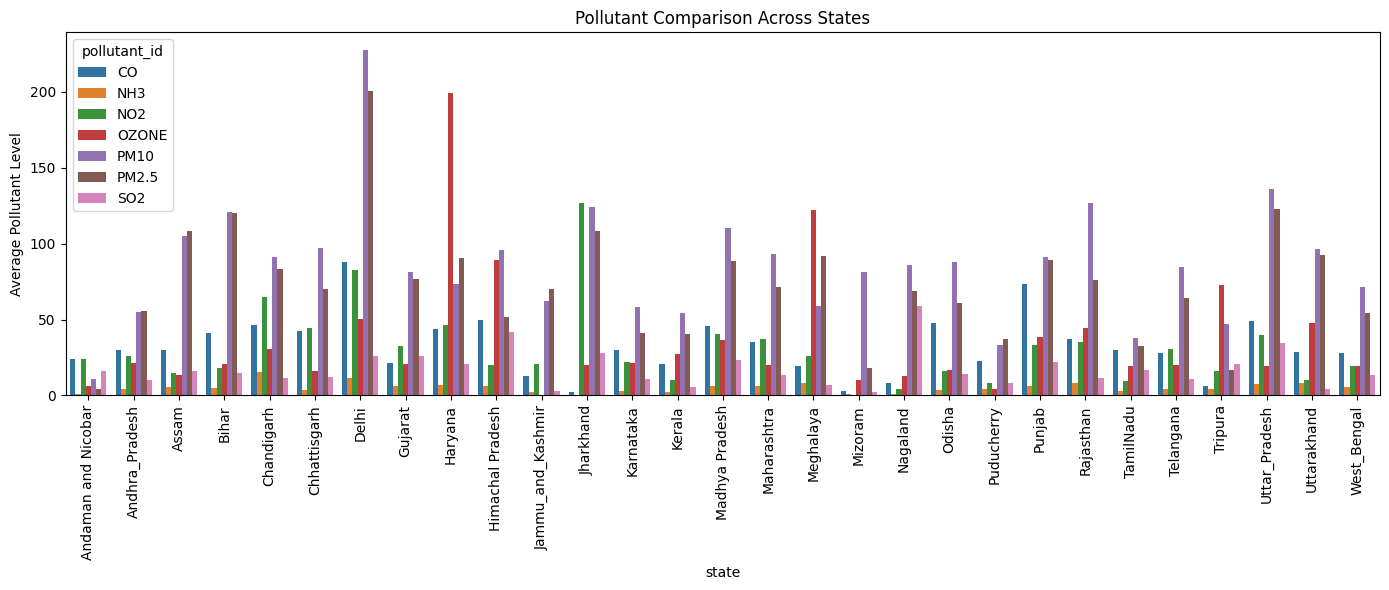

In [21]:
comparison = clean_df.groupby(['state', 'pollutant_id'])['pollutant_avg'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=comparison, x='state', y='pollutant_avg', hue='pollutant_id')
plt.xticks(rotation=90)
plt.title('Pollutant Comparison Across States')
plt.ylabel('Average Pollutant Level')
plt.tight_layout()
plt.show()

#Trigger alerts if any station exceeds safety limits.

In [33]:
def alert_system(row):
    if (row['pollutant_id'] == 'OZONE' and row['pollutant_avg'] > 100) or \
       (row['pollutant_id'] == 'NO2' and row['pollutant_avg'] > 80) or \
       (row['pollutant_id'] == 'SO2' and row['pollutant_avg'] > 75):
        return True
    return False
clean_df.loc[:, 'alert'] = clean_df.apply(alert_system, axis=1)
alerts = clean_df[clean_df['alert'] == True][['city', 'station', 'pollutant_id', 'pollutant_avg']]
alerts.head(10)

,city,station,pollutant_id,pollutant_avg
93,Raipur,"Bhatagaon New ISBT, Raipur - CECB",NO2,88.0
113,Delhi,"Anand Vihar, Delhi - DPCC",NO2,90.0
120,Delhi,"Jahangirpuri, Delhi - DPCC",NO2,202.0
124,Delhi,"Najafgarh, Delhi - DPCC",NO2,102.0
128,Delhi,"Okhla Phase-2, Delhi - DPCC",OZONE,156.0
129,Delhi,"Nehru Nagar, Delhi - DPCC",OZONE,184.0
166,Delhi,"Patparganj, Delhi - DPCC",NO2,81.0
426,Alwar,"Moti Doongri, Alwar - RSPCB",NO2,95.0
569,Noida,"Sector-116, Noida - UPPCB",NO2,118.0
712,Delhi,"Chandni Chowk, Delhi - IITM",NO2,135.0


In this Box plot showing the distribution of average pollutant levels for each pollutant type.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2300\1093735161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_df, x='pollutant_id', y='pollutant_avg', palette='Set2')


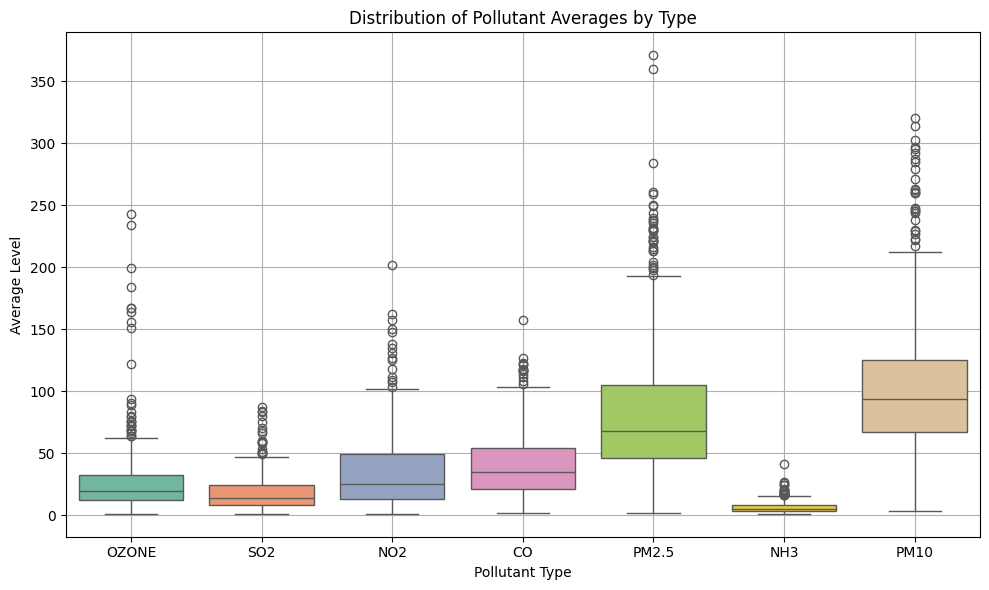

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='pollutant_id', y='pollutant_avg', palette='Set2')
plt.title('Distribution of Pollutant Averages by Type')
plt.xlabel('Pollutant Type')
plt.ylabel('Average Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pollution Heatmap by State and Pollutant.

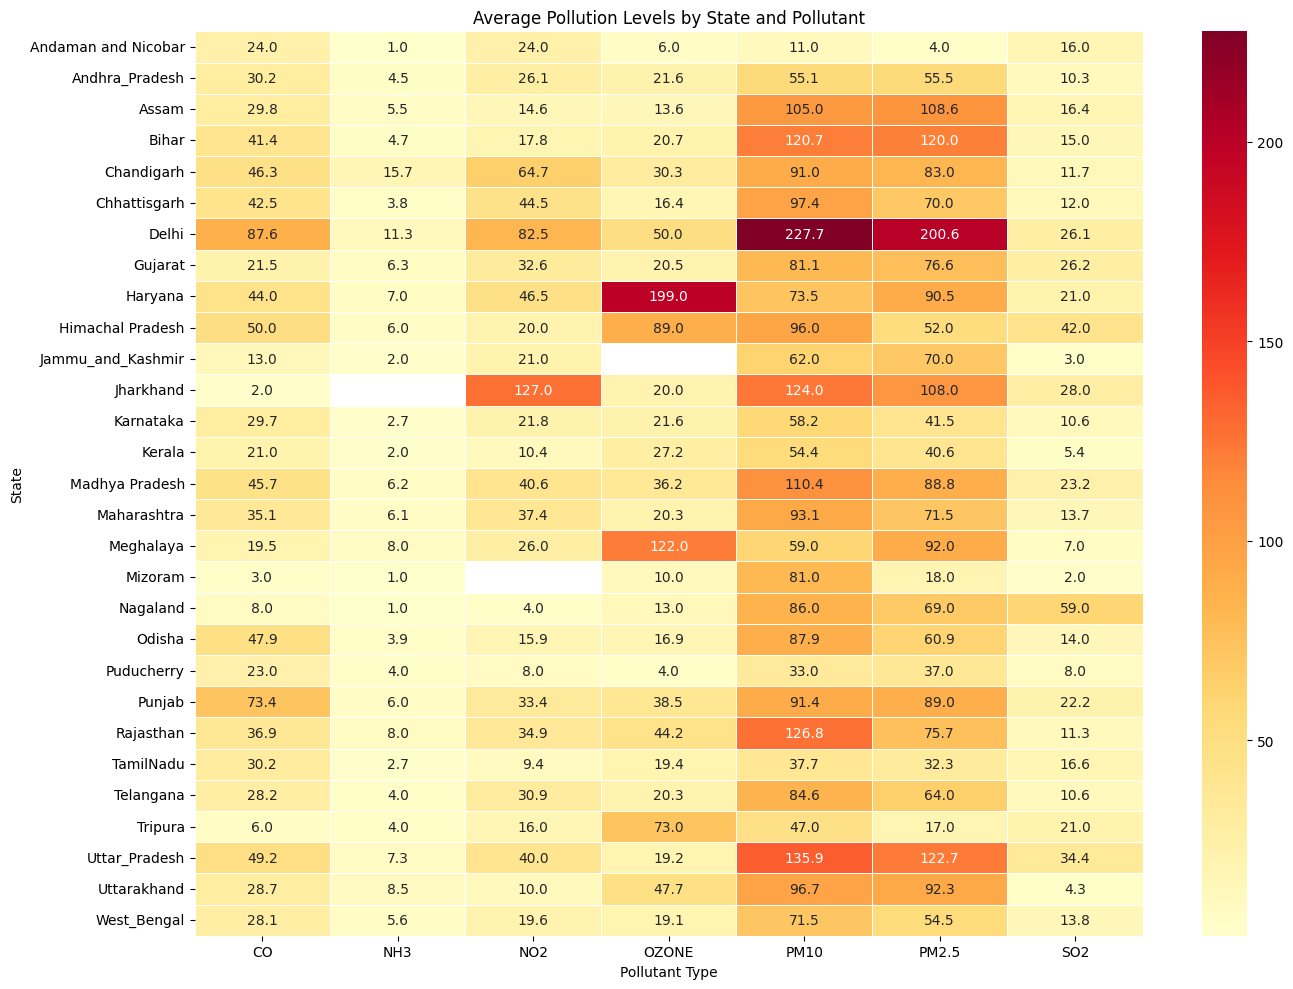

In [24]:
heatmap_data = clean_df.pivot_table(
    index='state',
    columns='pollutant_id',
    values='pollutant_avg',
    aggfunc='mean'
)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Average Pollution Levels by State and Pollutant')
plt.xlabel('Pollutant Type')
plt.ylabel('State')
plt.tight_layout()
plt.show()

Bar Plot to Visualize the Average Pollution by Pollutant Type

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2300\812943027.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pollutant, x='pollutant_id', y='pollutant_avg', palette='viridis')


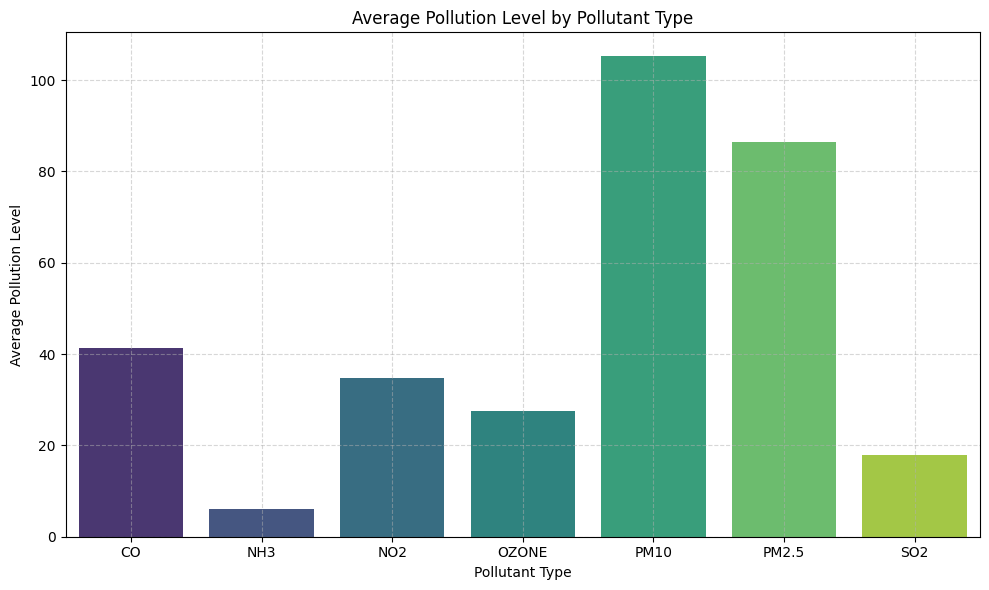

In [29]:
avg_pollutant = clean_df.groupby('pollutant_id')['pollutant_avg'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_pollutant, x='pollutant_id', y='pollutant_avg', palette='viridis')
plt.title('Average Pollution Level by Pollutant Type')
plt.xlabel('Pollutant Type')
plt.ylabel('Average Pollution Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Line Plot of Pollution Level Across Stations

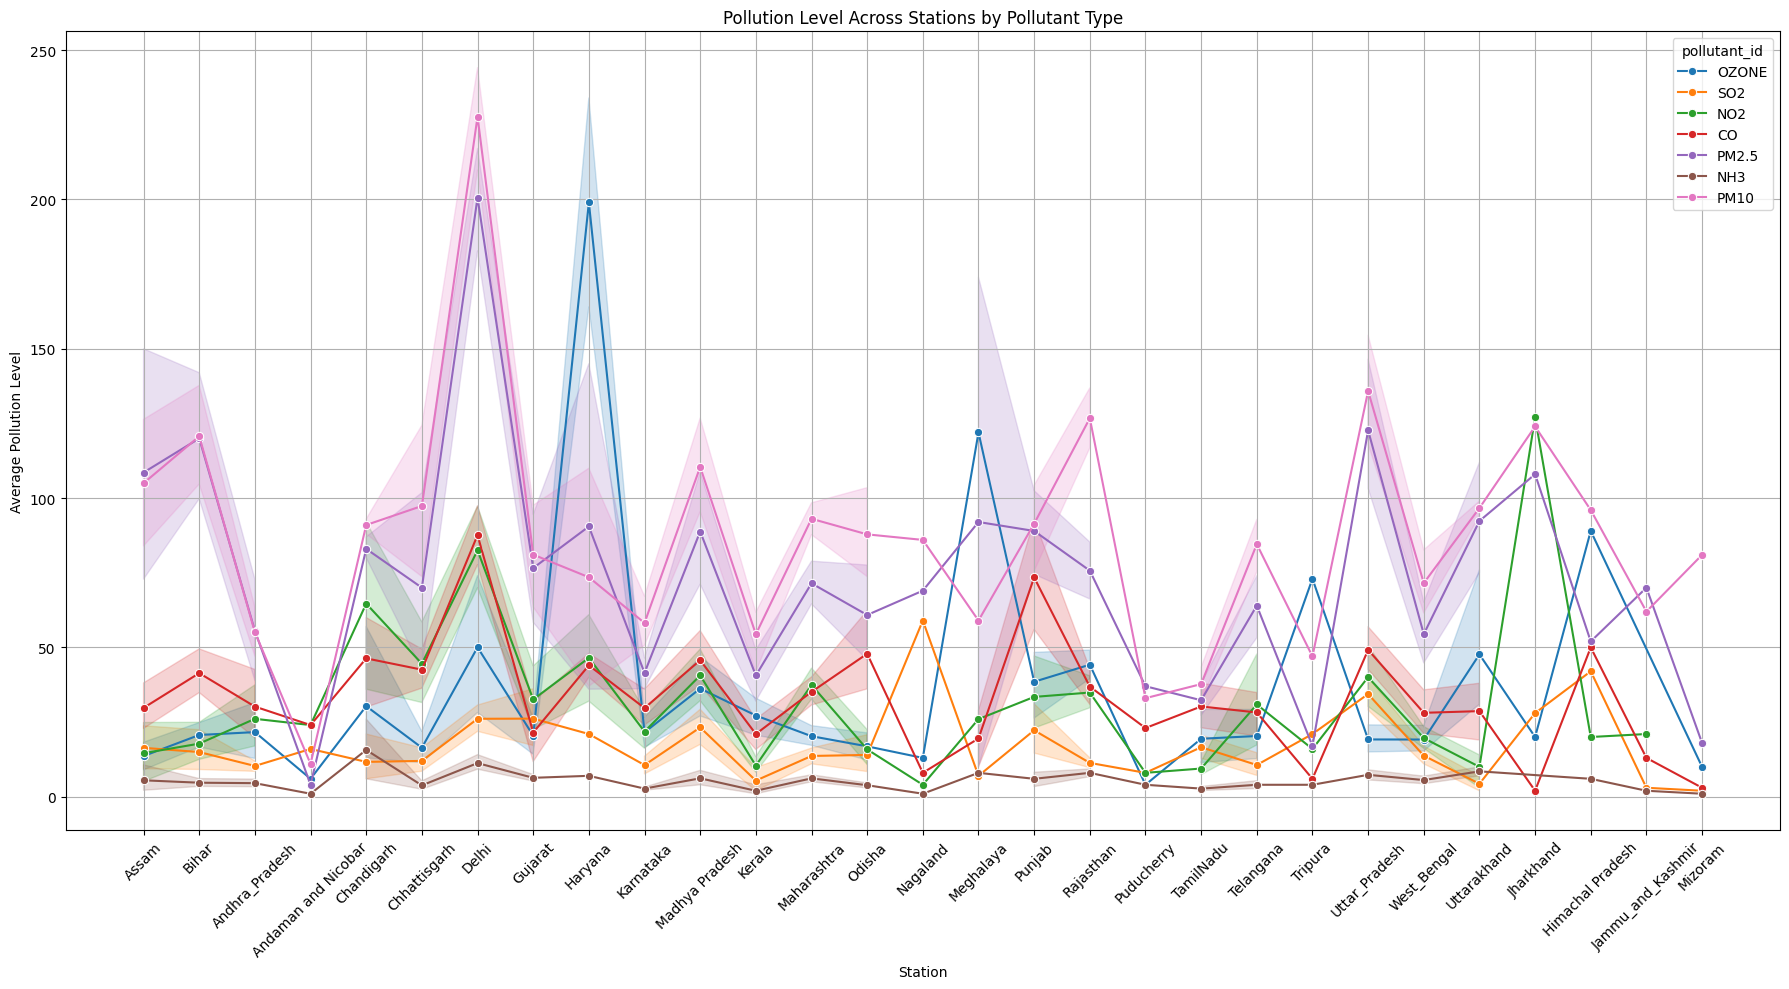

In [27]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=clean_df, x='state', y='pollutant_avg', hue='pollutant_id', marker='o')
plt.title('Pollution Level Across Stations by Pollutant Type')
plt.xlabel('Station')
plt.ylabel('Average Pollution Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

 In this RegPlot show the linear relationship between two numerical variables between Average vs Minimum Pollution Level.

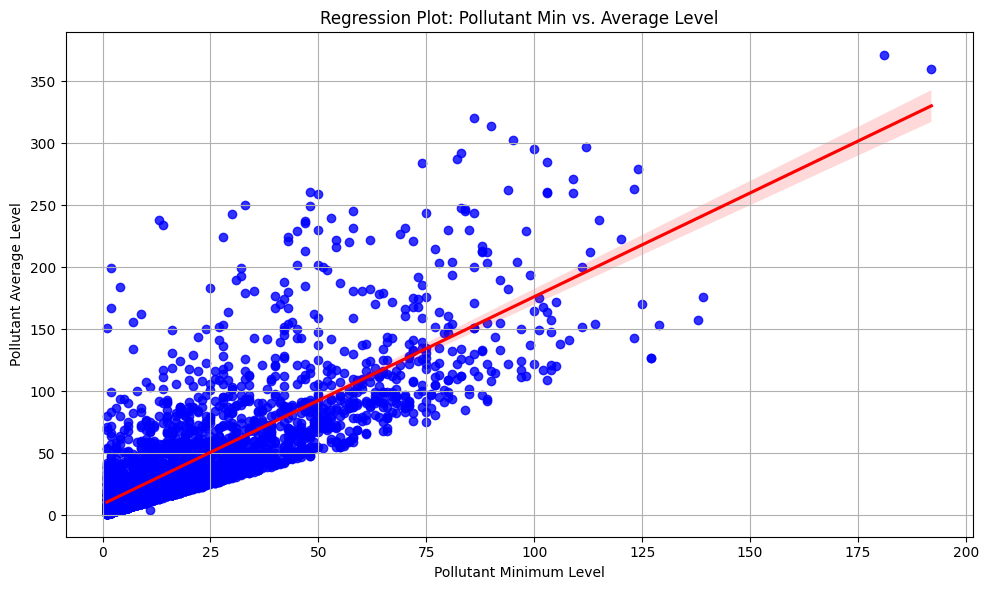

In [28]:
# Plot regression
plt.figure(figsize=(10, 6))
sns.regplot(data=clean_df, x='pollutant_min', y='pollutant_avg', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Regression Plot: Pollutant Min vs. Average Level')
plt.xlabel('Pollutant Minimum Level')
plt.ylabel('Pollutant Average Level')
plt.grid(True)
plt.tight_layout()
plt.show()

 Index plot of pollutant_avg.

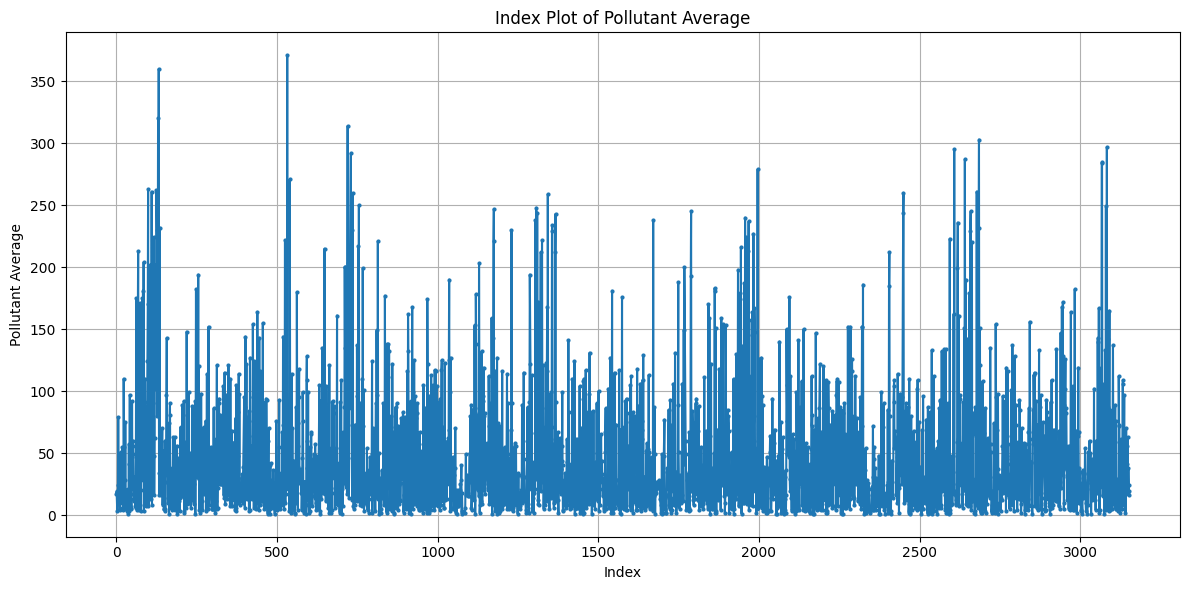

In [88]:
# Index plot
df_clean = df.dropna(subset=['pollutant_avg'])
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['pollutant_avg'], marker='o', linestyle='-', markersize=2)
plt.title('Index Plot of Pollutant Average')
plt.xlabel('Index')
plt.ylabel('Pollutant Average')
plt.grid(True)
plt.tight_layout()
plt.show()

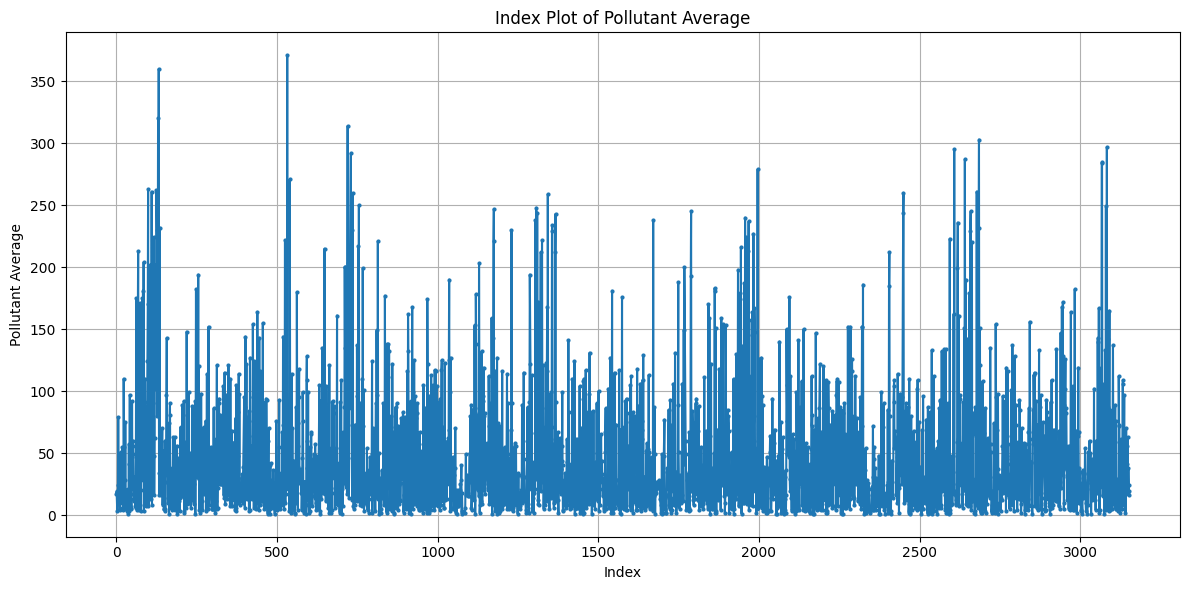

In [88]:
# Index plot
df_clean = df.dropna(subset=['pollutant_avg'])
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['pollutant_avg'], marker='o', linestyle='-', markersize=2)
plt.title('Index Plot of Pollutant Average')
plt.xlabel('Index')
plt.ylabel('Pollutant Average')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# df_clean = df.dropna(subset=['pollutant_avg'])
# print(df_clean.index)

Index([   0,    1,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153],
      dtype='int64', length=2892)


This pie chart shows the percentage share of each pollutant type

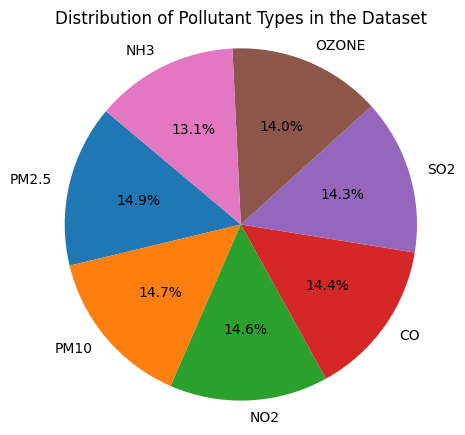

In [150]:
pollutant_counts = df['pollutant_id'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(pollutant_counts, labels=pollutant_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pollutant Types in the Dataset')
plt.axis('equal')
plt.show()